## PE09-1

In [1]:
import numpy #library to compute linear algebraic equations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #is a Python statistical data visualization lib based on matplotlib
import warnings
warnings.simplefilter(action='ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
features = pd.read_csv('../data/Features data set.csv')
sales = pd.read_csv('../data/sales data-set.csv')
stores = pd.read_csv('../data/stores data-set.csv')

In [3]:
#features.head()
features.shape #There are 8,190 store, date and holiday combinations

(8190, 12)

In [4]:
#sales.head()
sales.shape #There are 421,570 sales transactions

(421570, 5)

In [5]:
#stores.head()
stores.shape #There are 45 stores in question

(45, 3)

In [6]:
merged_df = features.merge(sales, on=['Store', 'Date', 'IsHoliday']).merge(stores, on=['Store'])
merged_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


In [7]:
merged_df['IsHoliday'] = merged_df['IsHoliday'].apply(lambda x:1 if x==True else 0)
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,1,24924.50,A,151315
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,2,50605.27,A,151315
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,3,13740.12,A,151315
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,4,39954.04,A,151315
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,32229.38,A,151315


In [8]:
merged_df.to_csv('retailsales.csv')

<Axes: xlabel='CPI', ylabel='Density'>

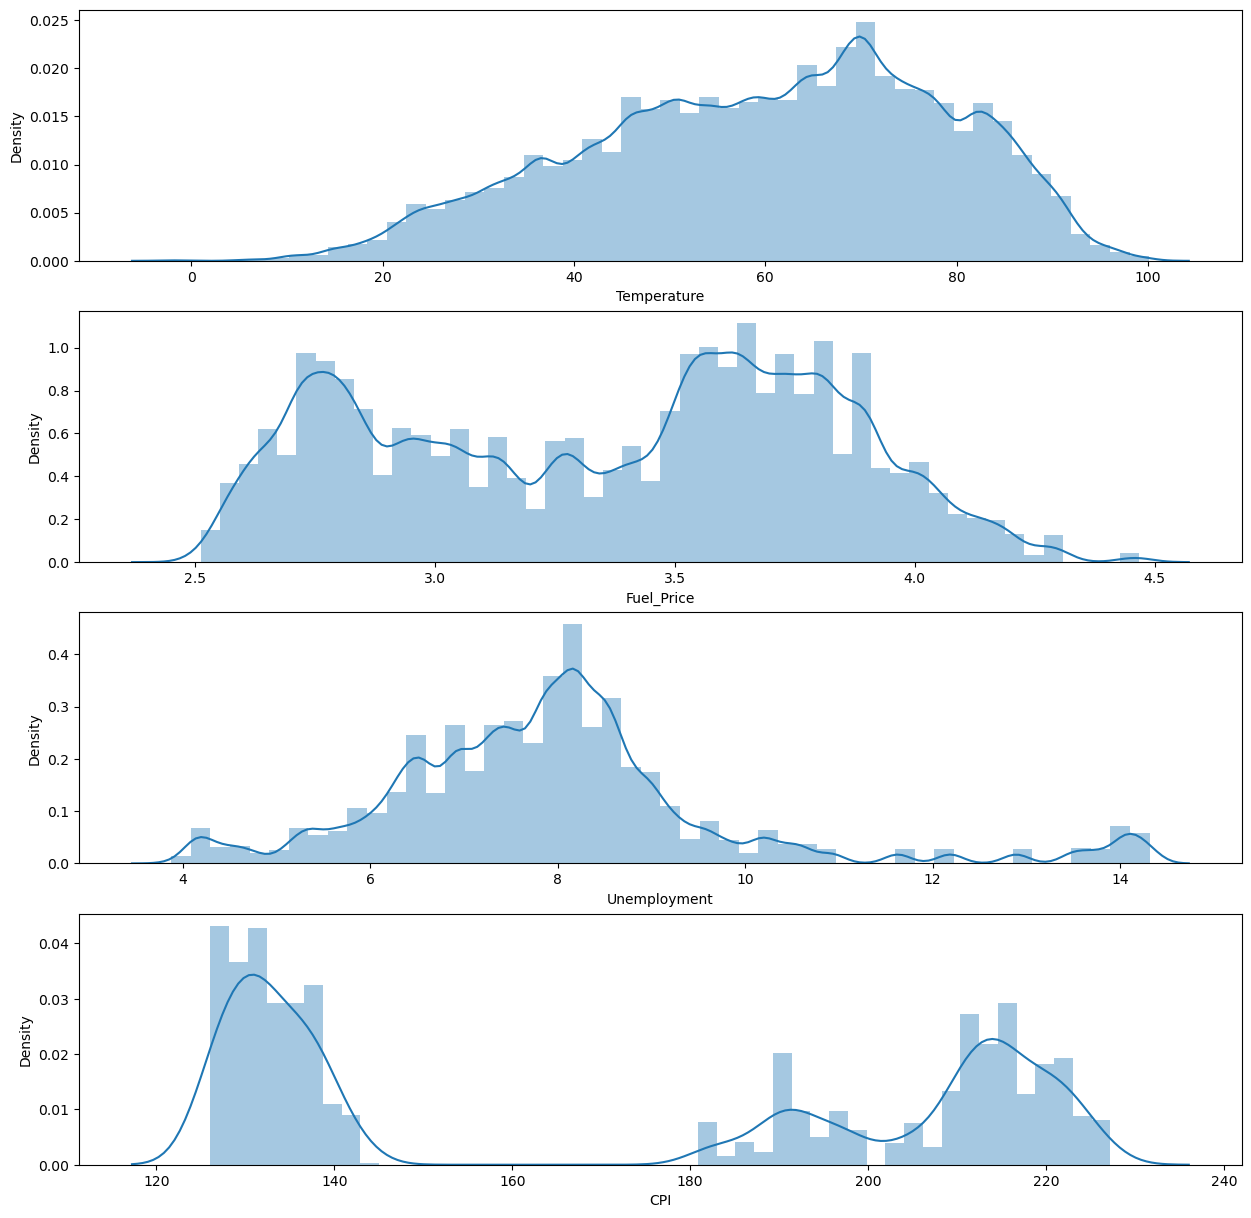

In [9]:
#Create a figure and a set of subplots
f, ax = plt.subplots(4, figsize=(15, 15)) #f=figure; ax=axes
sns.distplot(merged_df.Temperature, ax=ax[0])
sns.distplot(merged_df.Fuel_Price, ax=ax[1])
sns.distplot(merged_df.Unemployment, ax=ax[2])
sns.distplot(merged_df.CPI, ax=ax[3])

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

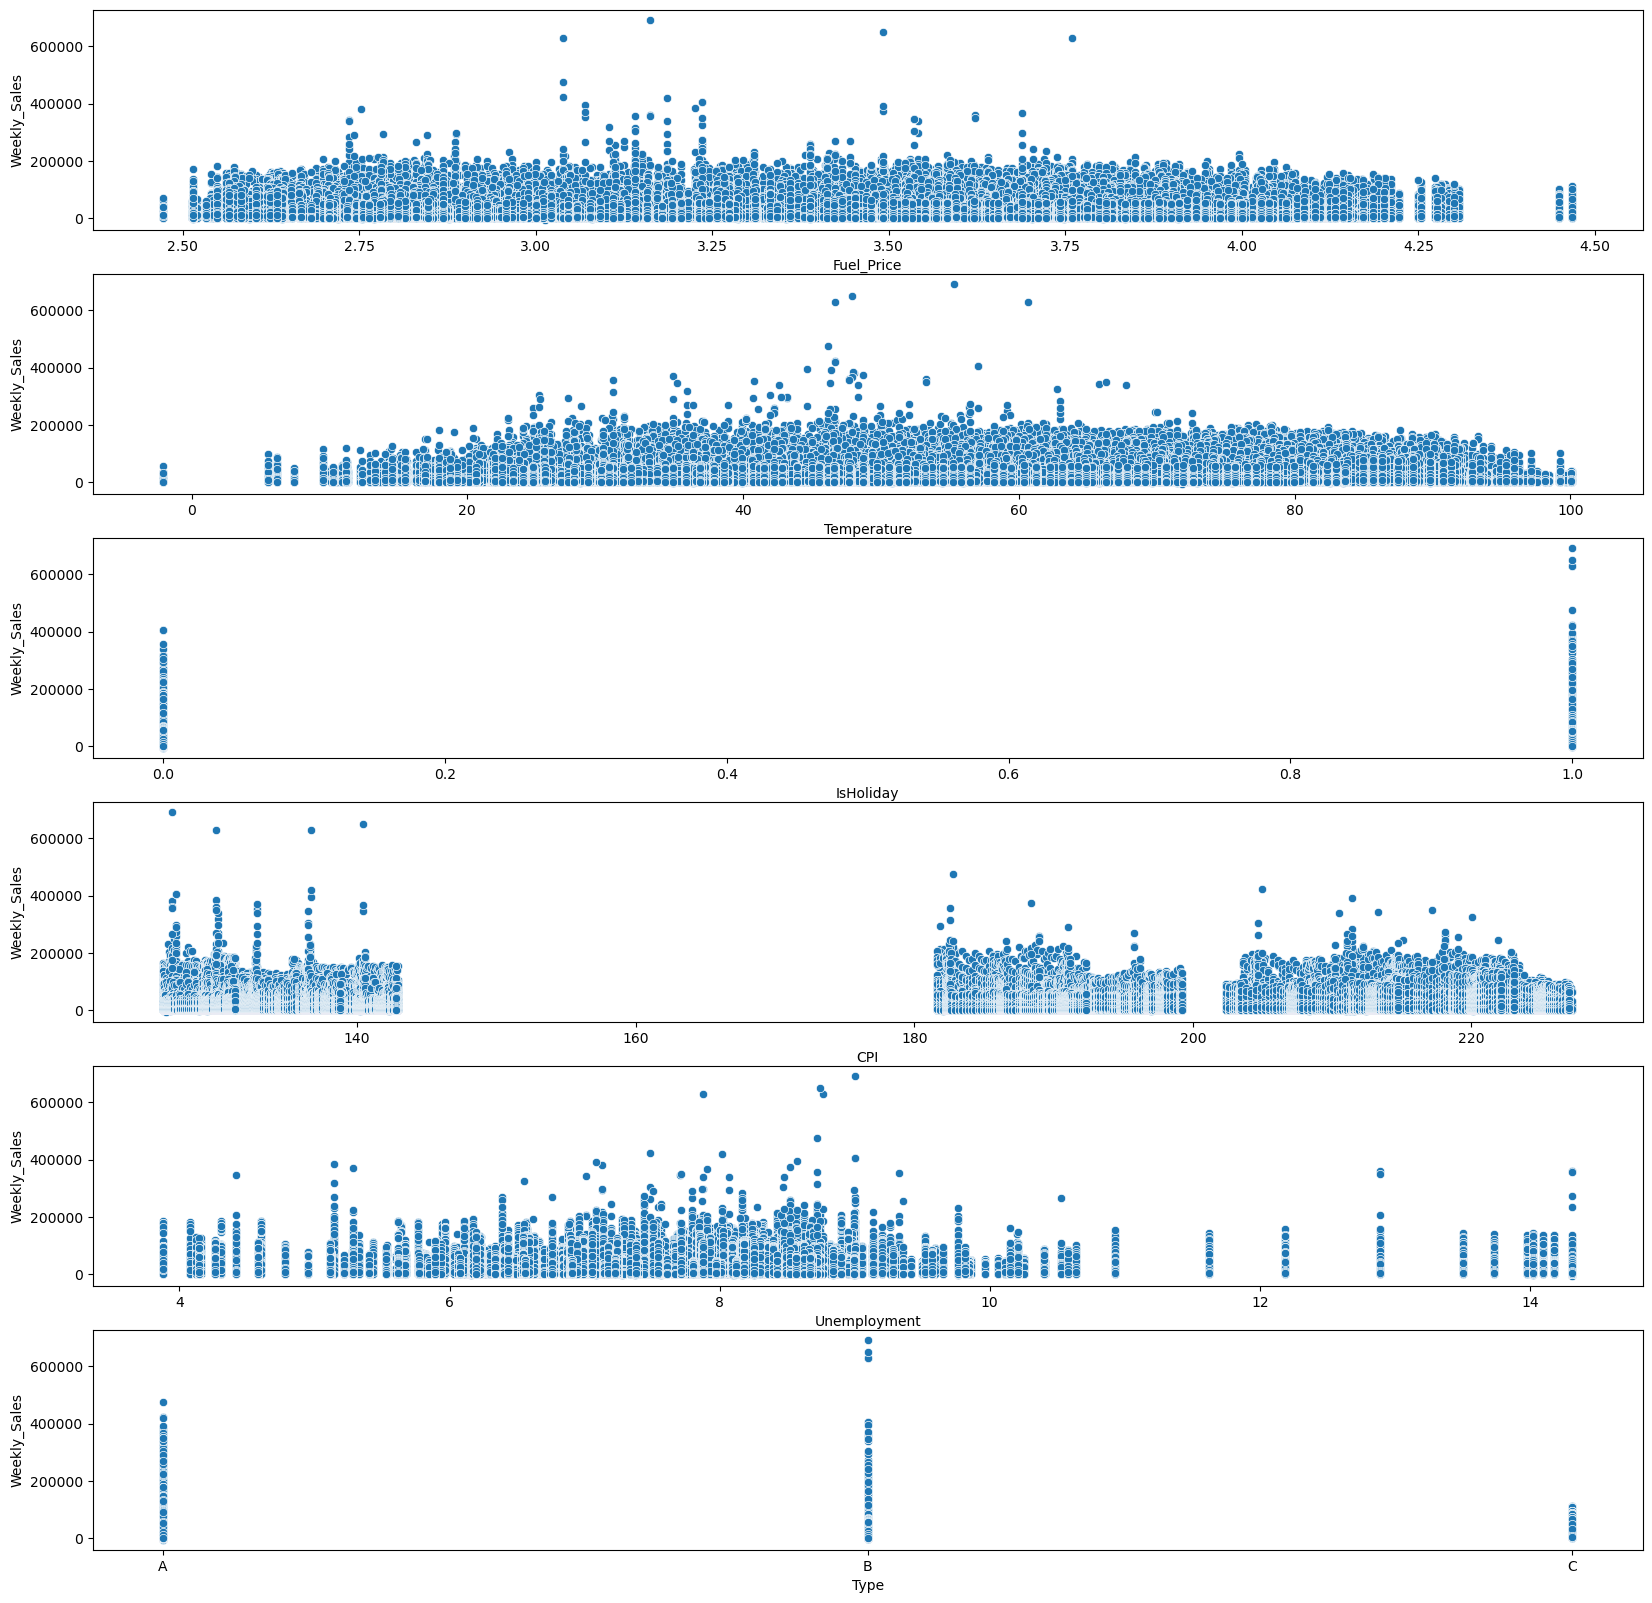

In [10]:
f, ax = plt.subplots(6, figsize=(20,20))

sns.scatterplot(x="Fuel_Price", y="Weekly_Sales", data=merged_df, ax=ax[0])
sns.scatterplot(x="Temperature", y="Weekly_Sales", data=merged_df, ax=ax[1])
sns.scatterplot(x="IsHoliday", y="Weekly_Sales", data=merged_df, ax=ax[2])
sns.scatterplot(x="CPI", y="Weekly_Sales", data=merged_df, ax=ax[3])
sns.scatterplot(x="Unemployment", y="Weekly_Sales", data=merged_df, ax=ax[4])
sns.scatterplot(x="Type", y="Weekly_Sales", data=merged_df, ax=ax[5])

In [11]:
# Save store 20 data
store20_data = merged_df.loc[merged_df['Store']==20]
store20_data.to_csv('../data/store20_sales.csv', index=False)